# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# input_csv_path = 'NBA_2021_2022_Bet_Outcomes.csv'
# output_csv_path = 'NBA_2021_2022_bet_outcomes_corrected_dates.csv'

# def correct_month(month):
#     if month > 50:
#         return month - 50
#     elif month > 40:
#         return month - 40
#     elif month > 30:
#         return month - 30
#     return month

# def correct_day(month, day):

#     month_days = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 
#                   7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
    
#     if day == 0 or day > month_days.get(month, 31):
#         return 1
#     return day

# def correct_date(mmdd):
#     month = int(mmdd[:2])
#     day = int(mmdd[2:])
#     month = correct_month(month)  
#     day = correct_day(month, day)  
   
#     year = '2021' if month >= 10 else '2022'
#     return f"{month:02d}/{day:02d}/{year}"

# with open(input_csv_path, mode='r', newline='') as infile, open(output_csv_path, mode='w', newline='') as outfile:
#     reader = csv.reader(infile)
#     writer = csv.writer(outfile)
    
#     header = next(reader)
#     writer.writerow(header)
    
#     for row in reader:
#         row[0] = correct_date(row[0]) 
#         writer.writerow(row)


player_stats = pd.read_csv('2021-22_NBA_Player_Stats_ Per Game.csv')
bet_outcomes = pd.read_csv('NBA_2021_2022_bet_outcomes_corrected_dates.csv')
player_streaks = pd.read_csv('Player_Streak_Stats.csv')

# player_stats.head()
# bet_outcomes.head(2500)
# player_streaks.head()

In [ ]:
teamname_mapping = {
    'HOU': 'Houston',
    'OKC': 'OklahomaCity',
    'DAL': 'Dallas',
    'BOS': 'Boston',
    'WAS': 'Washington',
    'LAL': 'LALakers',
    'MIA': 'Miami',
    'POR': 'Portland',
    'PHI': 'Philadelphia',
    'NYK': 'NewYork',
    'LAC': 'LAClippers',
    'GSW': 'GoldenState',
    'MIL': 'Milwaukee',
    'BRK': 'Brooklyn',
    'DEN': 'Denver',
    'NOP': 'NewOrleans',
    'PHO': 'Phoenix',
    'MEM': 'Memphis',
    'TOR': 'Toronto',
    'SAC': 'Sacramento',
    'CHI': 'Chicago',
    'CLE': 'Cleveland',
    'MIN': 'Minnesota',
    'UTA': 'Utah',
    'ATL': 'Atlanta',
    'IND': 'Indiana',
    'CHO': 'Charlotte', 
    'DET': 'Detroit',
    'SAS': 'SanAntonio',  
    'CHA': 'Charlotte', 
    'ORL': 'Orlando',
}

def convert_teamname(team):
    if pd.isna(team) or ',' in team:
        return None
    else:
        return teamname_mapping.get(team, None)

player_streaks['Mapped Team'] = player_streaks['Team'].apply(convert_teamname)
player_streaks_clean = player_streaks.dropna(subset=['Mapped Team'])

bet_outcomes['Date'] = pd.to_datetime(bet_outcomes['Date'], dayfirst=True)

bet_outcomes['Mapped Team'] = bet_outcomes['Team'].map(teamname_mapping).fillna(bet_outcomes['Team'])

bet_outcomes_simplified = bet_outcomes[['Date', 'Mapped Team', 'Final', 'ML']]
player_streaks_simplified = player_streaks_clean[['Player', 'Mapped Team', 'Streak Started', 'Streak Ended']]

streaks_with_bets = pd.DataFrame()
data_to_append = []

for index, streak in player_streaks_simplified.iterrows():
    matching_bets = bet_outcomes_simplified[
        (bet_outcomes_simplified['Mapped Team'] == streak['Mapped Team']) &
        (bet_outcomes_simplified['Date'] >= streak['Streak Started']) &
        (bet_outcomes_simplified['Date'] <= streak['Streak Ended'])
    ]
    for _, bet in matching_bets.iterrows():
        data_to_append.append({
            'Player': streak['Player'],
            'Team': streak['Mapped Team'],
            'Streak Started': streak['Streak Started'],
            'Streak Ended': streak['Streak Ended'],
            'Bet Date': bet['Date'],
            'Final Score': bet['Final'],
            'Money Line': bet['ML']
        })

streaks_with_bets = pd.DataFrame(data_to_append)


print("\nbet Outcomes Date Range:")
print(bet_outcomes['Date'].min(), "to", bet_outcomes['Date'].max())
print("\nunique Teams in Bet Outcomes:")
print(bet_outcomes['Team'].unique())
print("\nunique Teams in Player Streaks:")
print(player_streaks['Team'].unique())
print("\nplayer_streaks date range:")
print(player_streaks[['Player','Streak Started', 'Streak Ended']].head())




bet Outcomes Date Range:
2021-10-01 00:00:00 to 2022-03-01 00:00:00

unique Teams in Bet Outcomes:
['Brooklyn' 'Milwaukee' 'GoldenState' 'LALakers' 'Indiana' 'Charlotte'
 'Chicago' 'Detroit' 'Washington' 'Toronto' 'Boston' 'NewYork' 'Cleveland'
 'Memphis' 'Philadelphia' 'NewOrleans' 'Houston' 'Minnesota' 'Orlando'
 'SanAntonio' 'OklahomaCity' 'Utah' 'Sacramento' 'Portland' 'Denver'
 'Phoenix' 'Dallas' 'Atlanta' 'Miami' 'LAClippers' 'Golden State']

unique Teams in Player Streaks:
['CHI' 'PHI' 'MEM' 'LAL' 'DEN' 'HOU' 'DAL' 'MIL' 'BOS' 'TOR' 'BRK' 'ATL'
 'UTA' 'GSW' 'PHO' 'OKC' 'SAC' 'NOP' 'POR' 'MIN' 'LAC' 'NYK' 'SAS' 'CHO'
 'CLE' 'WAS' 'IND' 'DET' 'MIA']

player_streaks date range:
          Player Streak Started Streak Ended
0  DeMar DeRozan     2022-02-04   2022-02-26
1    Joel Embiid     2021-12-26   2022-01-12
2      Ja Morant     2022-01-19   2022-01-31
3   LeBron James     2021-12-19   2021-12-31
4    Joel Embiid     2022-01-15   2022-01-25


C:\Users\mAs-\AppData\Local\Temp\ipykernel_8136\57099352.py:44: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  bet_outcomes['Date'] = pd.to_datetime(bet_outcomes['Date'], dayfirst=True)


# Visualizations


Index(['Player', 'Team', 'Streak Started', 'Streak Ended', 'Bet Date',
       'Final Score', 'Money Line', 'Streak Length'],
      dtype='object')


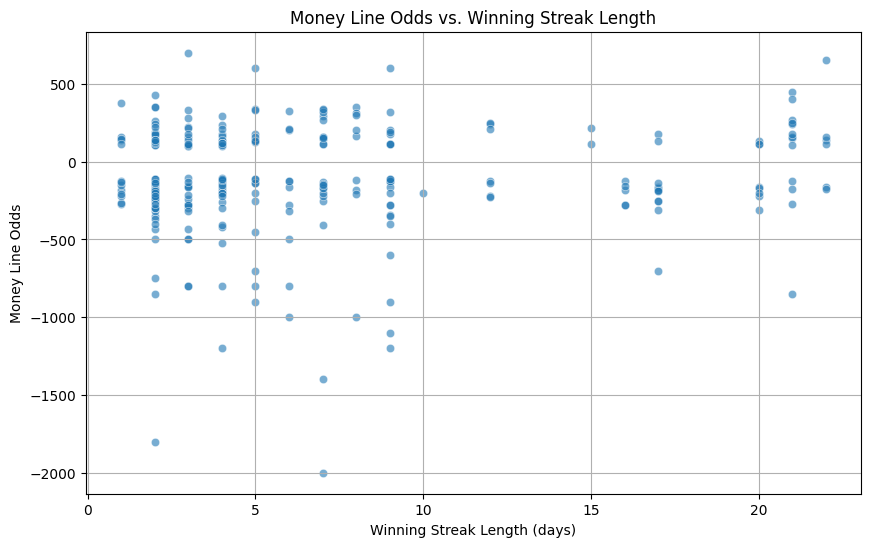

In [ ]:
streaks_with_bets['Streak Started'] = pd.to_datetime(streaks_with_bets['Streak Started'])
streaks_with_bets['Streak Ended'] = pd.to_datetime(streaks_with_bets['Streak Ended'])

streaks_with_bets['Streak Length'] = (streaks_with_bets['Streak Ended'] - streaks_with_bets['Streak Started']).dt.days

print(streaks_with_bets.columns)

streaks_with_bets['Money Line'] = pd.to_numeric(streaks_with_bets['Money Line'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Streak Length', y='Money Line', data=streaks_with_bets, alpha=0.6, edgecolor='w')

plt.title('Money Line Odds vs. Winning Streak Length')
plt.xlabel('Winning Streak Length (days)')
plt.ylabel('Money Line Odds')
plt.grid(True)
plt.show()

The chart visualizes the longest winning streaks of basketball players and it relations with moneyline odds. it show the player with more win streak will often mean higher money line odds

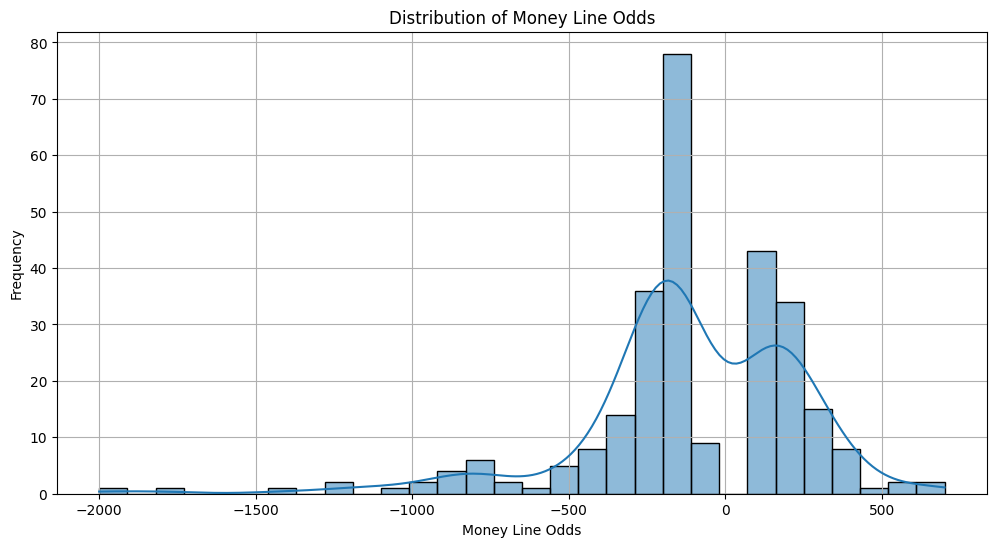

In [ ]:
# Distribution of Money Line Odds
plt.figure(figsize=(12, 6))
sns.histplot(streaks_with_bets['Money Line'], bins=30, kde=True)
plt.title('Distribution of Money Line Odds')
plt.xlabel('Money Line Odds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

To visualize how the money line odds are distributed across the dataset, helping to understand the commonality and range of odds offered. this chart provides a detailed look at the odds' spread, highlighting the most common odds given

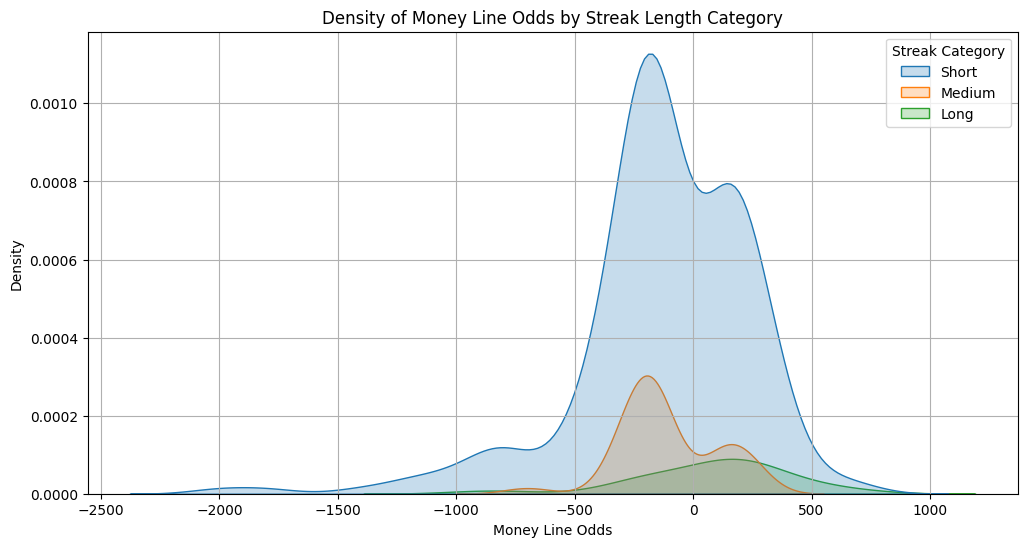

In [ ]:
#  Density Plot of Money Line Odds for Different Streak Lengths
streaks_with_bets['Streak Category'] = pd.cut(streaks_with_bets['Streak Length'], bins=[0, 10, 20, float('inf')], labels=['Short', 'Medium', 'Long'])

plt.figure(figsize=(12, 6))
sns.kdeplot(data=streaks_with_bets, x='Money Line', hue='Streak Category', fill=True)
plt.title('Density of Money Line Odds by Streak Length Category')
plt.xlabel('Money Line Odds')
plt.ylabel('Density')
plt.grid(True)
plt.show()

 this density plot offers insights into how the distribution of money line odds varies with different lengths of winning streaks, any trends or patterns that may exist between the streaks and the odds offered by bookmakers
 

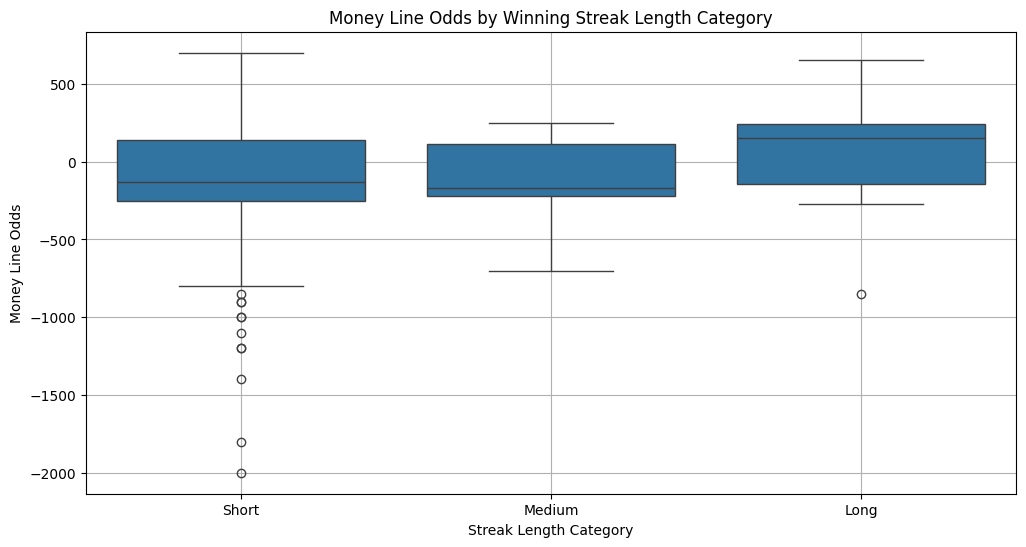

In [ ]:
# Boxplot of Money Line Odds by Streak Length Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Streak Category', y='Money Line', data=streaks_with_bets)
plt.title('Money Line Odds by Winning Streak Length Category')
plt.xlabel('Streak Length Category')
plt.ylabel('Money Line Odds')
plt.grid(True)
plt.show()


this boxplot is an effective in visually assessing the relationship between the length of winning streaks and the corresponding money line odds, showing differences in variance, median, and outliers within each category

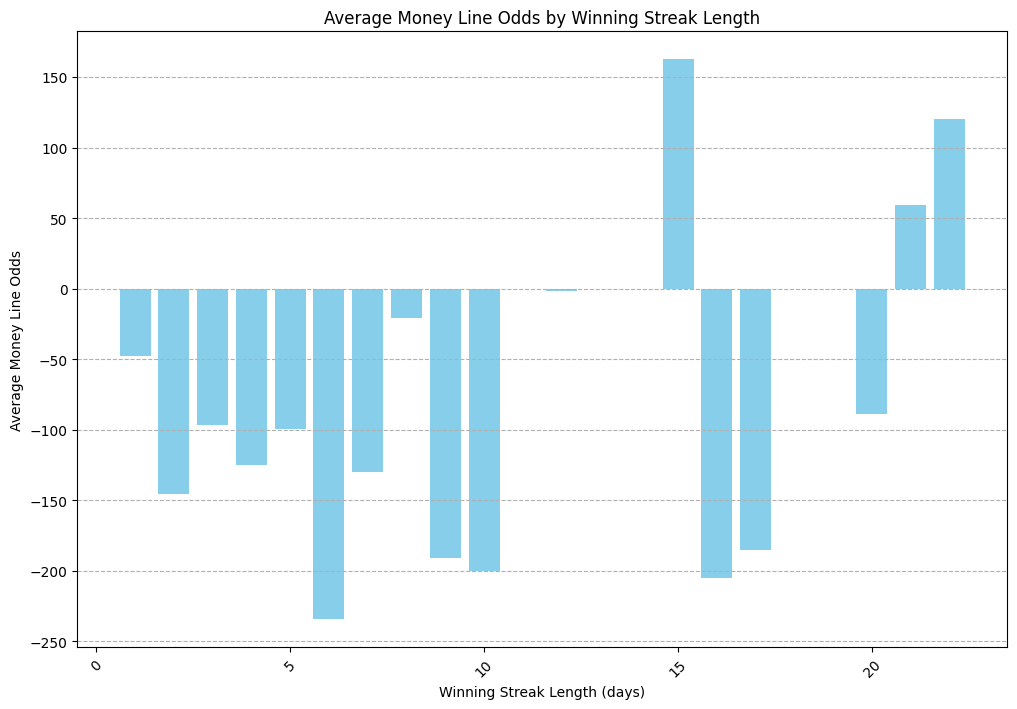

In [ ]:
average_money_line_by_streak = streaks_with_bets.groupby('Streak Length')['Money Line'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(average_money_line_by_streak['Streak Length'], average_money_line_by_streak['Money Line'], color='skyblue')

plt.title('Average Money Line Odds by Winning Streak Length')
plt.xlabel('Winning Streak Length (days)')
plt.ylabel('Average Money Line Odds')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


this bar chart show a clear and detailed comparison of how the average money line odds differs with different winning streak lengths. it highlights trends or patterns in the betting odds as streaks extend over time. this does show very little effect of individual player on a win streak

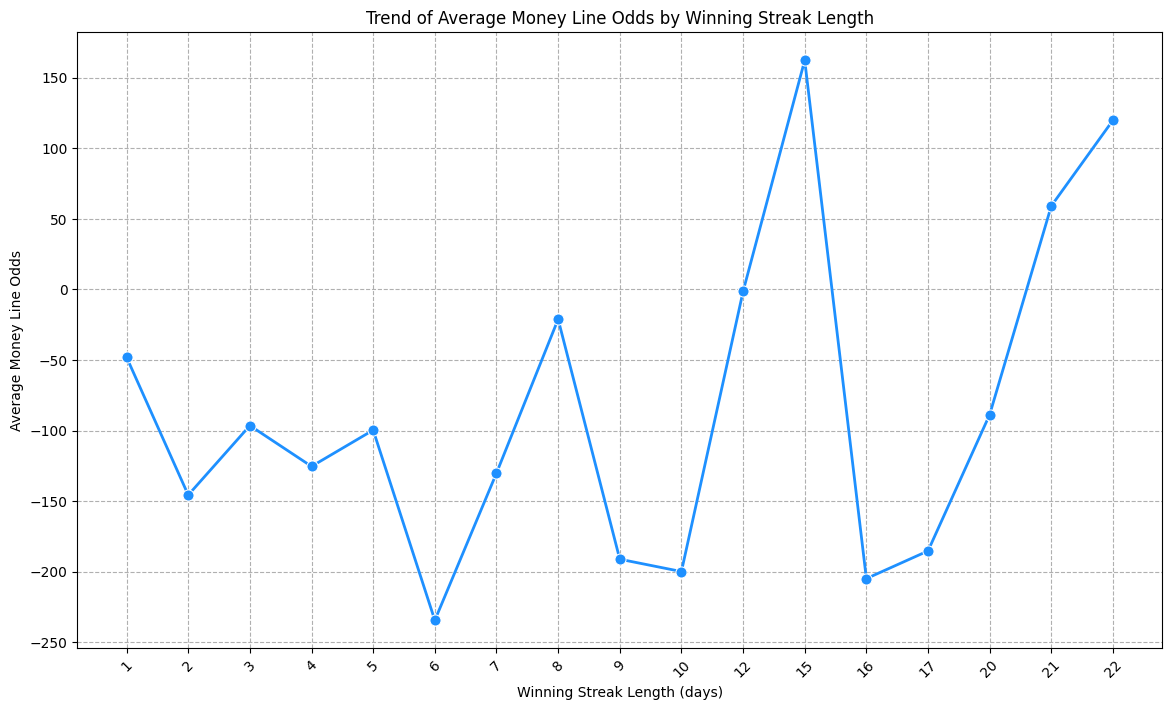

In [ ]:
average_money = streaks_with_bets.groupby('Streak Length')['Money Line'].mean().reset_index()

average_money['Streak Length'] = average_money['Streak Length'].astype(str)

plt.figure(figsize=(14, 8))
sns.lineplot(x='Streak Length', y='Money Line', data=average_money,
             marker='o', markersize=8, color='dodgerblue', linewidth=2)

plt.title('Trend of Average Money Line Odds by Winning Streak Length')
plt.xlabel('Winning Streak Length (days)')
plt.ylabel('Average Money Line Odds')
plt.grid(True, which='both', linestyle='--')
plt.xticks(rotation=45)

plt.show()

this chart provides a clear visualization of how the average money line odds evolve with the length of winning streaks. gives valuable insights into the dynamics of betting odds in relation to player performance. this show how player wind streak does effect money line odds

C:\Users\mAs-\AppData\Local\Temp\ipykernel_8136\1308119369.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = streaks_with_bets.pivot_table(index='Streak Length Bin', columns='Money Line Bin', aggfunc='size', fill_value=0)


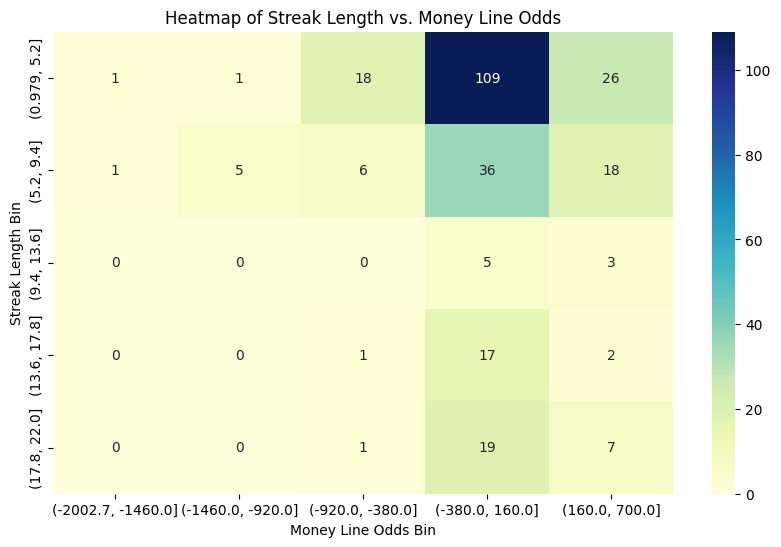

In [ ]:
streaks_with_bets['Streak Length Bin'] = pd.cut(streaks_with_bets['Streak Length'], bins=5)
streaks_with_bets['Money Line Bin'] = pd.cut(streaks_with_bets['Money Line'], bins=5)

heatmap_data = streaks_with_bets.pivot_table(index='Streak Length Bin', columns='Money Line Bin', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Streak Length vs. Money Line Odds')
plt.xlabel('Money Line Odds Bin')
plt.ylabel('Streak Length Bin')
plt.show()

This heatmap effectively illustrates the distribution and frequency of combinations between different ranges of winning streak lengths and money line odds, offering insights into which combinations are most common and potentially highlighting trends or patterns in the data, such as preferred odds for certain streak lengths.

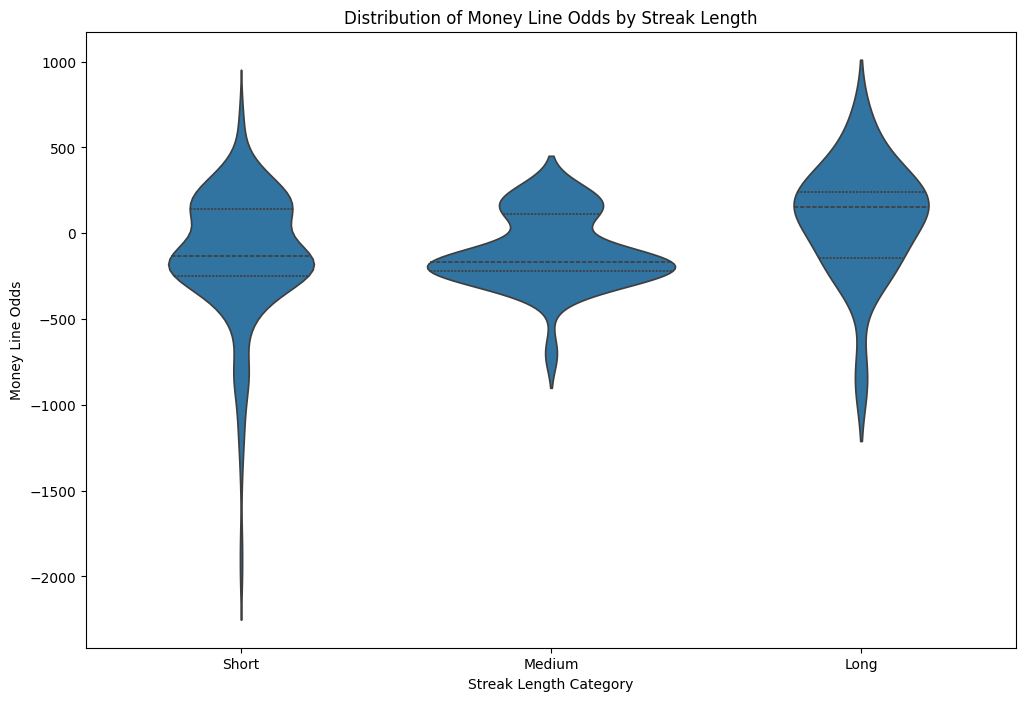

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Streak Category', y='Money Line', data=streaks_with_bets, inner='quartile')
plt.title('Distribution of Money Line Odds by Streak Length')
plt.xlabel('Streak Length Category')
plt.ylabel('Money Line Odds')
plt.show()


this violin plot offers a comprehensive look at how the distribution of money line odds differs by streak length category, revealing both the central tendency and variability within each category

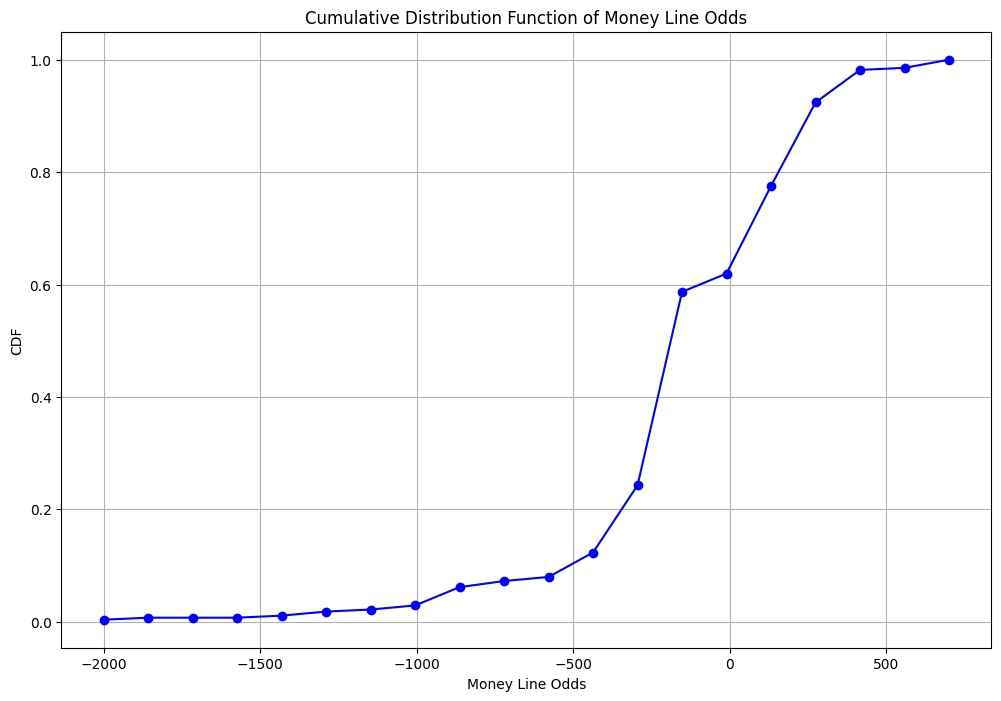

In [ ]:
a = streaks_with_bets['Money Line'].dropna()

num_bins = 20
cumfreq_result, _ = np.histogram(a, bins=num_bins)
x = np.linspace(min(a), max(a), num=len(cumfreq_result))

cdf = np.cumsum(cumfreq_result) / np.sum(cumfreq_result)

plt.figure(figsize=(12, 8))
plt.plot(x, cdf, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Distribution Function of Money Line Odds')
plt.xlabel('Money Line Odds')
plt.ylabel('CDF')
plt.grid(True)
plt.show()


this CDF plot offers a visual representation of the distribution of money line odds, making it easy to see the probability of odds falling below a particular value. This can be particularly useful for identifying the odds' range within which the majority of bets are placed and understanding the overall distribution.

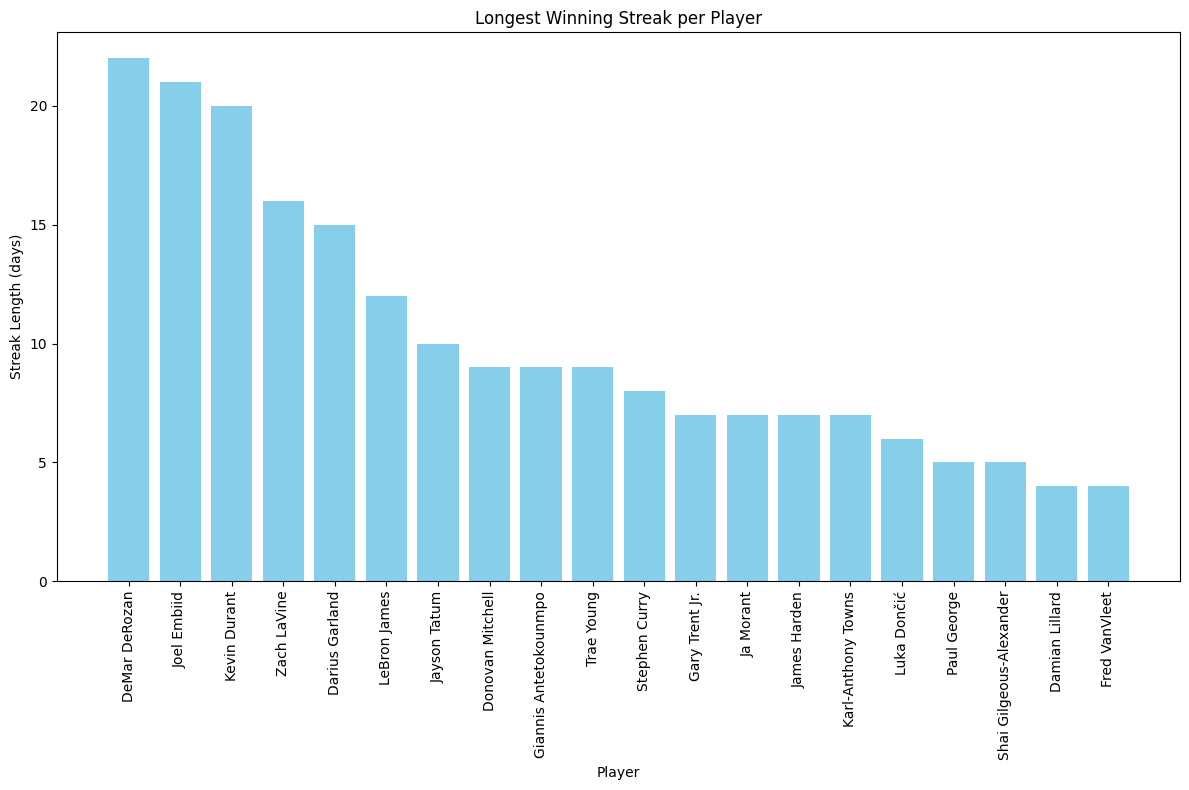

In [ ]:
longest_streaks_player = streaks_with_bets.groupby('Player')['Streak Length'].max().reset_index()

plt.figure(figsize=(12, 8))

top_streaks_player = longest_streaks_player.nlargest(20, 'Streak Length')

plt.bar(top_streaks_player['Player'], top_streaks_player['Streak Length'], color='skyblue')
plt.title('Longest Winning Streak per Player')
plt.xlabel('Player')
plt.ylabel('Streak Length (days)')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

This visualization effectively highlights the players with the most extended periods of success. this is to see if big name are on this list for explotatory reason and to help form questions.

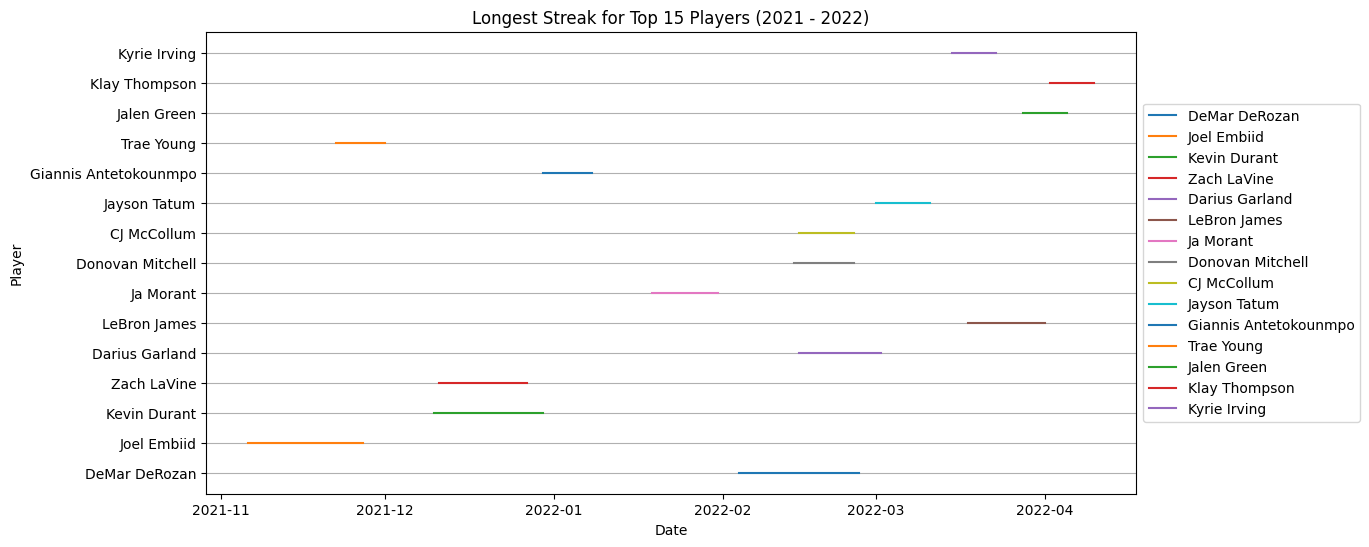

In [ ]:
player_streaks['Streak Started'] = pd.to_datetime(player_streaks['Streak Started'])
player_streaks['Streak Ended'] = pd.to_datetime(player_streaks['Streak Ended'])

player_streaks_filtered = player_streaks[(player_streaks['Streak Started'].dt.year >= 2021) & (player_streaks['Streak Ended'].dt.year <= 2022)]


player_streaks_filtered['Streak Duration'] = (player_streaks_filtered['Streak Ended'] - player_streaks_filtered['Streak Started']).dt.days

top_15_players = player_streaks_filtered.groupby('Player')['Streak Duration'].max().nlargest(15).index


plt.figure(figsize=(12, 6))
for player in top_15_players:
    player_data = player_streaks_filtered[player_streaks_filtered['Player'] == player]
    longest_streak = player_data.loc[player_data['Streak Duration'].idxmax()]
    plt.plot([longest_streak['Streak Started'], longest_streak['Streak Ended']], [player, player], label=player)

plt.xlabel('Date')
plt.ylabel('Player')
plt.title('Longest Streak for Top 15 Players (2021 - 2022)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(axis='y')
plt.show()

This visualization effectively highlights the players with the most extended periods of success. this is to see if big name are on this list for explotatory reason and to help form questions.

# Machine Learning Analysis 

In [5]:
import pandas as pd

# Load the CSV files
bet_outcomes_path = 'NBA_2021_2022_bet_outcomes_corrected_dates.csv'
player_streaks_path = 'Player_Streak_Stats.csv'

# Read the CSV files
bet_outcomes = pd.read_csv(bet_outcomes_path)
player_streaks = pd.read_csv(player_streaks_path)

# Display the first few rows of each DataFrame to understand their structure
bet_outcomes.head(), player_streaks.head()

(         Date  Rot VH         Team  1st  2nd  3rd  4th  Final   Open  Close  \
 0  10/19/2021  501  V     Brooklyn   25   34   26   19    104  240.5  233.5   
 1  10/19/2021  502  H    Milwaukee   37   29   31   30    127     pk    1.5   
 2  10/19/2021  503  V  GoldenState   32   21   30   38    121  230.5  226.5   
 3  10/19/2021  504  H     LALakers   34   25   26   29    114    4.5    3.5   
 4  10/20/2021  505  V      Indiana   38   37   13   34    122  228.5    1.5   
 
     ML     2H  Home/Away  
 0  105      2          0  
 1 -125    114          1  
 2  140  111.5          0  
 3 -160     pk          1  
 4 -125  110.5          0  ,
    Rk         Player Team  Streak Streak Started Streak Ended  Active   G  GS  \
 0   1  DeMar DeRozan  CHI      10     2022-02-04   2022-02-26     NaN  10  10   
 1   2    Joel Embiid  PHI       8     2021-12-26   2022-01-12     NaN   8   8   
 2   3      Ja Morant  MEM       7     2022-01-19   2022-01-31     NaN   7   7   
 3   4   LeBron James

In [9]:
import pandas as pd

# Defining teamname mappings
teamname_mapping = {
    'HOU': 'Houston',
    'OKC': 'OklahomaCity',
    'DAL': 'Dallas',
    'BOS': 'Boston',
    'WAS': 'Washington',
    'LAL': 'LALakers',
    'MIA': 'Miami',
    'POR': 'Portland',
    'PHI': 'Philadelphia',
    'NYK': 'NewYork',
    'LAC': 'LAClippers',
    'GSW': 'GoldenState',
    'MIL': 'Milwaukee',
    'BRK': 'Brooklyn',
    'DEN': 'Denver',
    'NOP': 'NewOrleans',
    'PHO': 'Phoenix',
    'MEM': 'Memphis',
    'TOR': 'Toronto',
    'SAC': 'Sacramento',
    'CHI': 'Chicago',
    'CLE': 'Cleveland',
    'MIN': 'Minnesota',
    'UTA': 'Utah',
    'ATL': 'Atlanta',
    'IND': 'Indiana',
    'CHO': 'Charlotte', 
    'DET': 'Detroit',
    'SAS': 'SanAntonio',  
    'CHA': 'Charlotte', 
    'ORL': 'Orlando',
}

# Function to map team names
def convert_teamname(team):
    if pd.isna(team) or ',' in team:
        return None
    else:
        return teamname_mapping.get(team, None)

# Applying the team name mapping to player streaks
player_streaks['Mapped Team'] = player_streaks['Team'].apply(convert_teamname)
player_streaks_clean = player_streaks.dropna(subset=['Mapped Team'])

# Converting date strings to datetime and mapping team names in bet outcomes
bet_outcomes['Date'] = pd.to_datetime(bet_outcomes['Date'], dayfirst=True)
bet_outcomes['Mapped Team'] = bet_outcomes['Team'].map(teamname_mapping).fillna(bet_outcomes['Team'])
bet_outcomes_simplified = bet_outcomes[['Date', 'Mapped Team', 'Final', 'ML']]

# Simplifying player streaks dataframe
player_streaks_simplified = player_streaks_clean[['Player', 'Mapped Team', 'Streak Started', 'Streak Ended']]

# Finding and merging streaks with corresponding betting outcomes
streaks_with_bets = pd.DataFrame()
data_to_append = []

for index, streak in player_streaks_simplified.iterrows():
    matching_bets = bet_outcomes_simplified[
        (bet_outcomes_simplified['Mapped Team'] == streak['Mapped Team']) &
        (bet_outcomes_simplified['Date'] >= streak['Streak Started']) &
        (bet_outcomes_simplified['Date'] <= streak['Streak Ended'])
    ]
    for _, bet in matching_bets.iterrows():
        data_to_append.append({
            'Player': streak['Player'],
            'Team': streak['Mapped Team'],
            'Streak Started': streak['Streak Started'],
            'Streak Ended': streak['Streak Ended'],
            'Bet Date': bet['Date'],
            'Final Score': bet['Final'],
            'Money Line': bet['ML']
        })

streaks_with_bets = pd.DataFrame(data_to_append)

# Displaying the merged data and preparing to plot
streaks_with_bets.head()

,Player,Team,Streak Started,Streak Ended,Bet Date,Final Score,Money Line
0,DeMar DeRozan,Chicago,2022-02-04,2022-02-26,2022-02-04,109,140
1,DeMar DeRozan,Chicago,2022-02-04,2022-02-26,2022-02-06,98,110
2,DeMar DeRozan,Chicago,2022-02-04,2022-02-26,2022-02-08,104,-165
3,DeMar DeRozan,Chicago,2022-02-04,2022-02-26,2022-02-09,107,-175
4,DeMar DeRozan,Chicago,2022-02-04,2022-02-26,2022-02-04,95,160


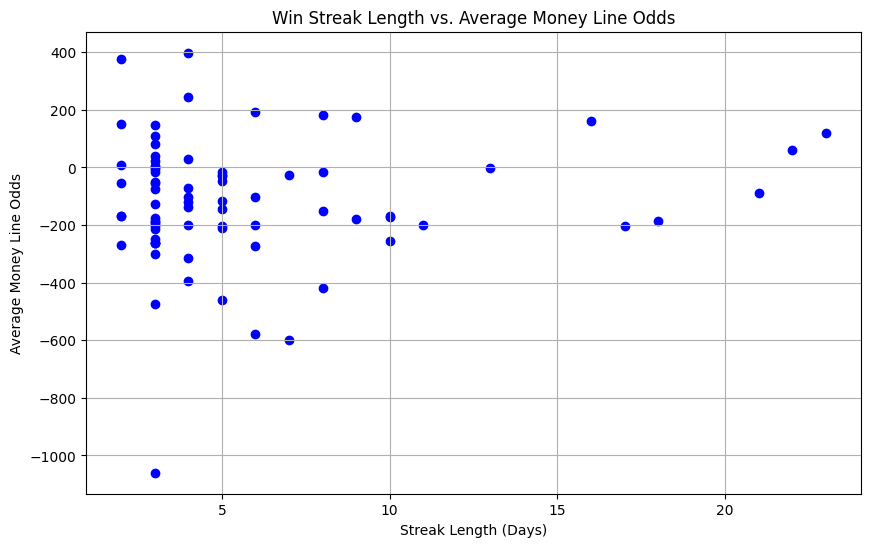

In [11]:
# Convert 'Streak Started' and 'Streak Ended' to datetime format
streaks_with_bets['Streak Started'] = pd.to_datetime(streaks_with_bets['Streak Started'])
streaks_with_bets['Streak Ended'] = pd.to_datetime(streaks_with_bets['Streak Ended'])

# Recalculate the length of each streak in days
streaks_with_bets['Streak Length'] = (streaks_with_bets['Streak Ended'] - streaks_with_bets['Streak Started']).dt.days + 1

# Group by player and streak to calculate average money line for each streak
streak_summary = streaks_with_bets.groupby(['Player', 'Streak Started', 'Streak Ended', 'Streak Length']).agg({
    'Money Line': 'mean'
}).reset_index()

# Plotting the streak length vs. average money line
plt.figure(figsize=(10, 6))
plt.scatter(streak_summary['Streak Length'], streak_summary['Money Line'], color='blue')
plt.title('Win Streak Length vs. Average Money Line Odds')
plt.xlabel('Streak Length (Days)')
plt.ylabel('Average Money Line Odds')
plt.grid(True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Preparing the data
X = streak_summary[['Streak Length']]  # Predictor
y = streak_summary['Money Line']       # Response

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

# Training the models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

# Calculating the Mean Squared Error for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svr = mean_squared_error(y_test, y_pred_svr)

mse_linear, mse_rf, mse_svr

(94072.58530143059, 95898.73668893639, 87980.97571108685)

xxxxxxxxxxxxxxxxxxxxxxxxxx


In [13]:
# Binning streak lengths into categories
streak_summary['Streak Length Binned'] = pd.cut(streak_summary['Streak Length'], bins=[0, 5, 10, 15, 20, 25, 30], labels=[1, 2, 3, 4, 5, 6])

# Prepare new features for the model
X_new = pd.get_dummies(streak_summary[['Streak Length Binned']], drop_first=True)
y_new = streak_summary['Money Line']

# Splitting the data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)


In [14]:
from sklearn.model_selection import GridSearchCV

# Setting up parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_new, y_train_new)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 30774.83


In [15]:
from sklearn.model_selection import GridSearchCV

# Setting up parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_new, y_train_new)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 30774.83


In [16]:
from sklearn.model_selection import cross_val_score

# Evaluating with cross-validation
scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), X_new, y_new, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores (MSE):", -scores)


Cross-validation scores (MSE): [94724.48610799 49640.21034268 15553.46435705 53785.30821341
 43169.18467205]


In [21]:
# Assuming we already have X_extended and y_extended as prepared above

# Splitting the extended dataset into training and testing sets
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended, y_extended, test_size=0.3, random_state=42)

# Selecting a model to train, for example, Random Forest
rf_model_ext = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model_ext.fit(X_train_ext, y_train_ext)

# Predicting on the test set
y_pred_ext = rf_model_ext.predict(X_test_ext)

# Evaluating the model using Mean Squared Error
mse_ext = mean_squared_error(y_test_ext, y_pred_ext)
print("Mean Squared Error on the extended dataset:", mse_ext)



NameError: name 'X_extended' is not defined

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("MSE for Decision Tree Regressor:", mse_dt)


MSE for Decision Tree Regressor: 99155.62689685961


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate MSE
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("MSE for Gradient Boosting Regressor:", mse_gb)


MSE for Gradient Boosting Regressor: 98533.33307554957


In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate MSE
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("MSE for K-Nearest Neighbors Regressor:", mse_knn)


MSE for K-Nearest Neighbors Regressor: 98174.95421587133


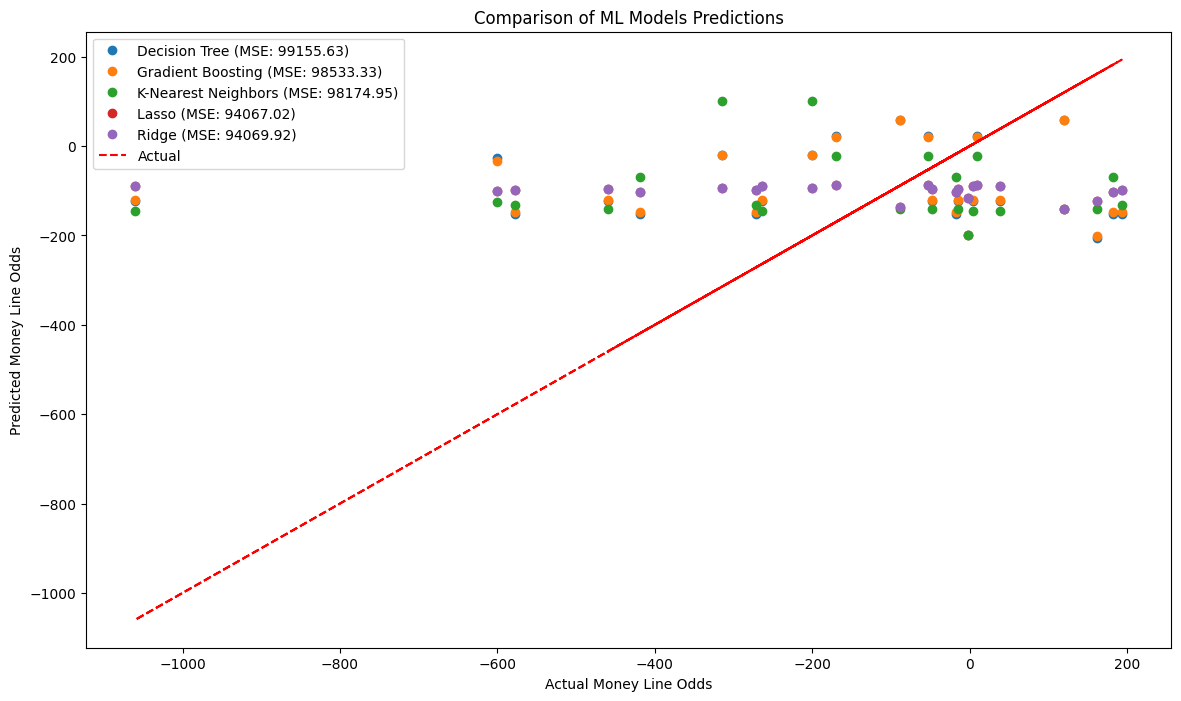

In [25]:
from sklearn.linear_model import Lasso, Ridge

# Initialize Lasso and Ridge regressors
lasso_model = Lasso(alpha=0.1, random_state=42)
ridge_model = Ridge(alpha=1, random_state=42)

# Train the models
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate MSE for each
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Gathering all predictions for plotting
predictions = {
    'Decision Tree': y_pred_dt,
    'Gradient Boosting': y_pred_gb,
    'K-Nearest Neighbors': y_pred_knn,
    'Lasso': y_pred_lasso,
    'Ridge': y_pred_ridge
}

# Plotting
plt.figure(figsize=(14, 8))
for model, pred in predictions.items():
    plt.plot(y_test.reset_index(drop=True), pred, 'o', label=f'{model} (MSE: {mean_squared_error(y_test, pred):.2f})')

plt.plot(y_test.reset_index(drop=True), y_test.reset_index(drop=True), 'r--', label='Actual')
plt.title('Comparison of ML Models Predictions')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Predicted Money Line Odds')
plt.legend()
plt.show()


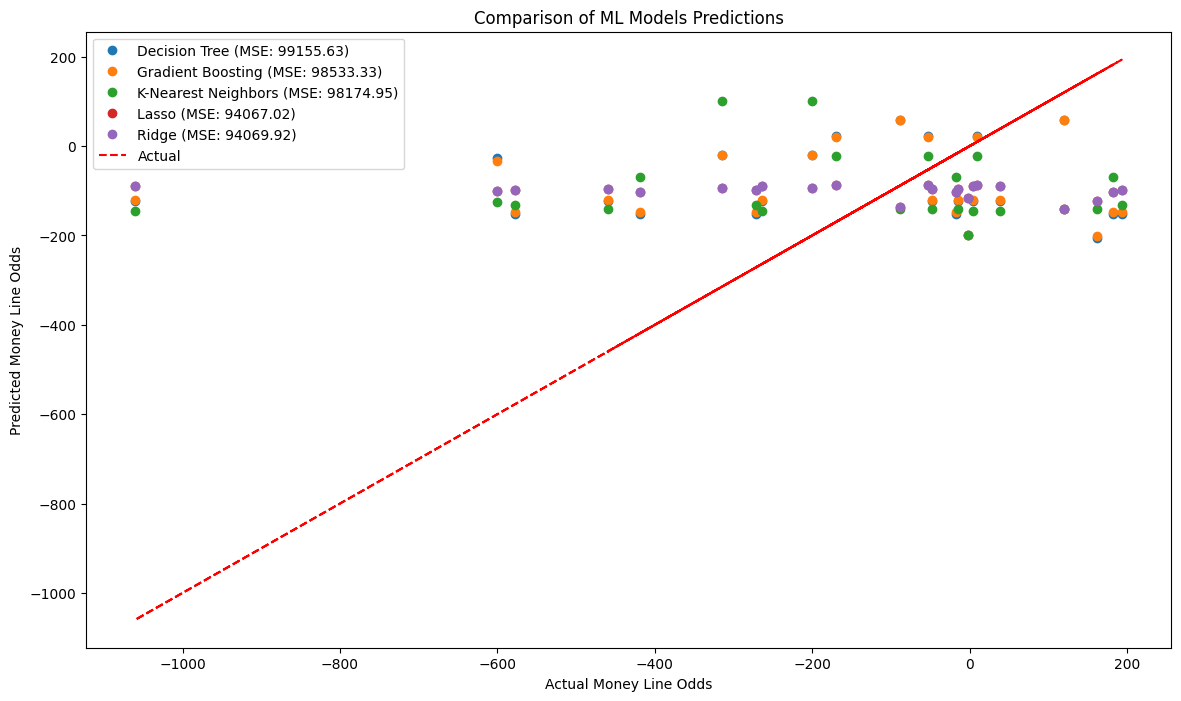

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge

# Initialize models
dt_model = DecisionTreeRegressor(random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
lasso_model = Lasso(alpha=0.1, random_state=42)
ridge_model = Ridge(alpha=1, random_state=42)

# Train models
dt_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate MSE for each
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Gather all predictions for plotting
predictions = {
    'Decision Tree': y_pred_dt,
    'Gradient Boosting': y_pred_gb,
    'K-Nearest Neighbors': y_pred_knn,
    'Lasso': y_pred_lasso,
    'Ridge': y_pred_ridge
}

# Plotting
plt.figure(figsize=(14, 8))
for model, pred in predictions.items():
    plt.plot(y_test.reset_index(drop=True), pred, 'o', label=f'{model} (MSE: {mean_squared_error(y_test, pred):.2f})')

plt.plot(y_test.reset_index(drop=True), y_test.reset_index(drop=True), 'r--', label='Actual')
plt.title('Comparison of ML Models Predictions')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Predicted Money Line Odds')
plt.legend()
plt.show()


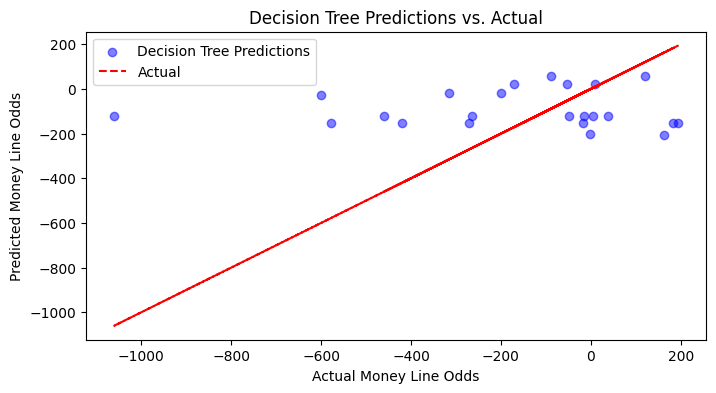

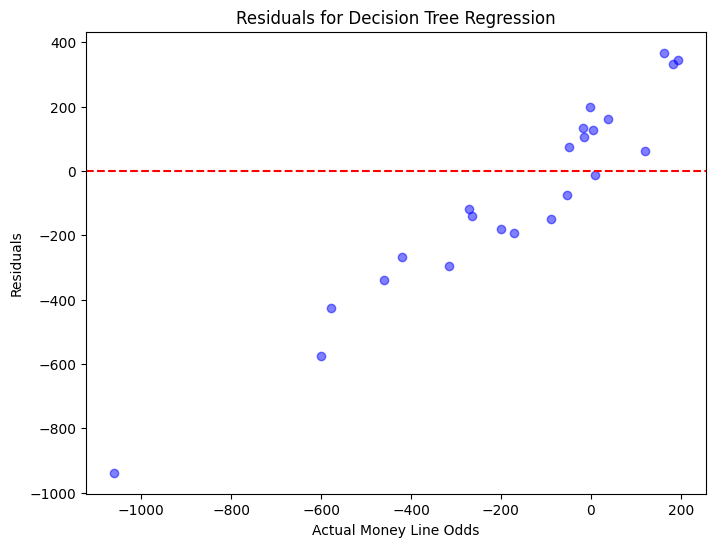

In [58]:
# # Creating individual plots for each model's predictions
# model_names = ['Decision Tree', 'Gradient Boosting', 'K-Nearest Neighbors', 'Lasso', 'Ridge']
# model_predictions = [y_pred_dt, y_pred_gb, y_pred_knn, y_pred_lasso, y_pred_ridge]

# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
# axes = axes.flatten()

# for i, model in enumerate(model_names):
#     ax = axes[i]
#     ax.scatter(y_test, model_predictions[i], color='blue', alpha=0.5, label=f'{model} Predictions')
#     ax.plot(y_test, y_test, 'r--', label='Actual')
#     ax.set_title(f'{model} Predictions vs. Actual')
#     ax.set_xlabel('Actual Money Line Odds')
#     ax.set_ylabel('Predicted Money Line Odds')
#     ax.legend()

# fig.delaxes(axes[-1])  # Remove the last subplot (extra)
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

# Assuming 'y_pred_dt' holds the predictions from the Decision Tree model
# and 'y_test' contains the actual values

plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5, label='Decision Tree Predictions')
plt.plot(y_test, y_test, 'r--', label='Actual')  # This line represents the perfect predictions
plt.title('Decision Tree Predictions vs. Actual')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Predicted Money Line Odds')
plt.legend()
plt.show()

# Calculate residuals
residuals_dt = y_test - y_pred_dt

# Plotting Residuals for Decision Tree Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_dt, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for Decision Tree Regression')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Residuals')
plt.show()


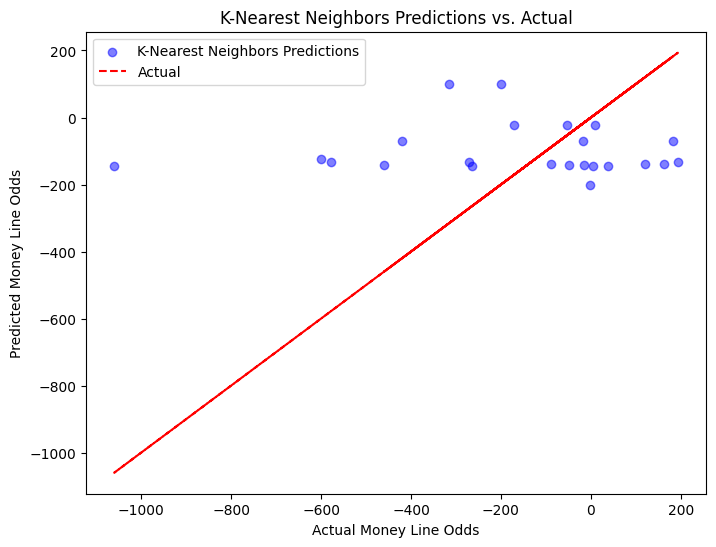

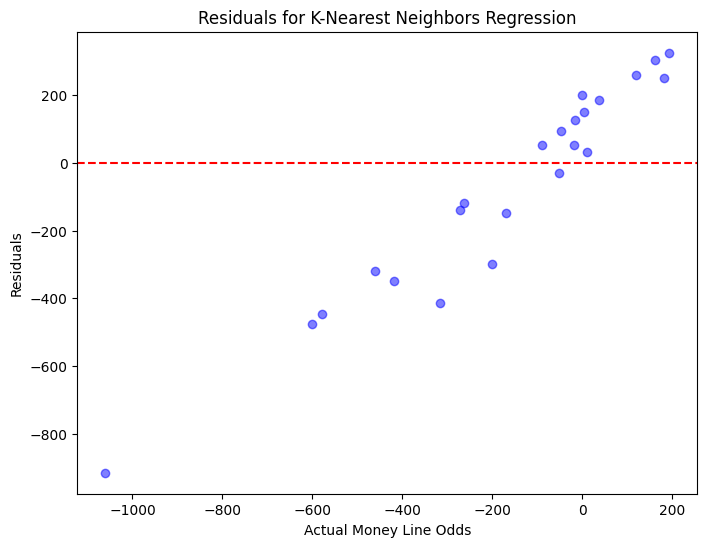

In [57]:

# Assuming 'y_pred_knn' holds the predictions from the K-Nearest Neighbors model
# and 'y_test' contains the actual values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5, label='K-Nearest Neighbors Predictions')
plt.plot(y_test, y_test, 'r--', label='Actual')  # This line represents the perfect predictions
plt.title('K-Nearest Neighbors Predictions vs. Actual')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Predicted Money Line Odds')
plt.legend()
plt.show()

# Calculate residuals
residuals_knn = y_test - y_pred_knn

# Plotting Residuals for K-Nearest Neighbors Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_knn, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for K-Nearest Neighbors Regression')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Residuals')
plt.show()


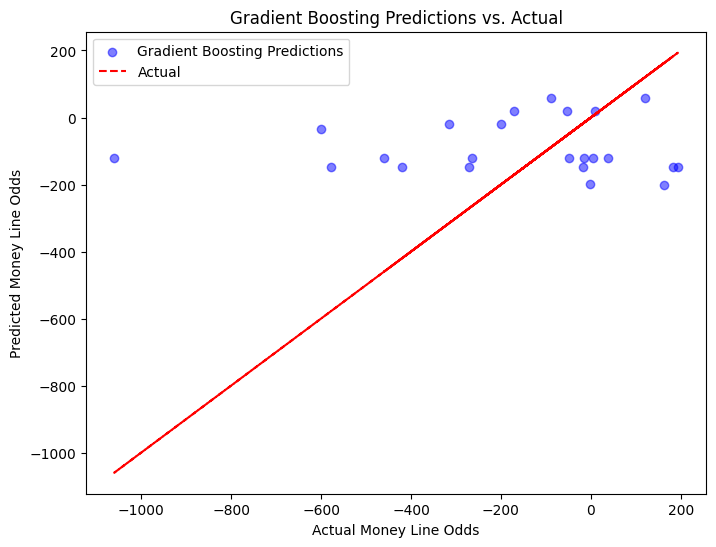

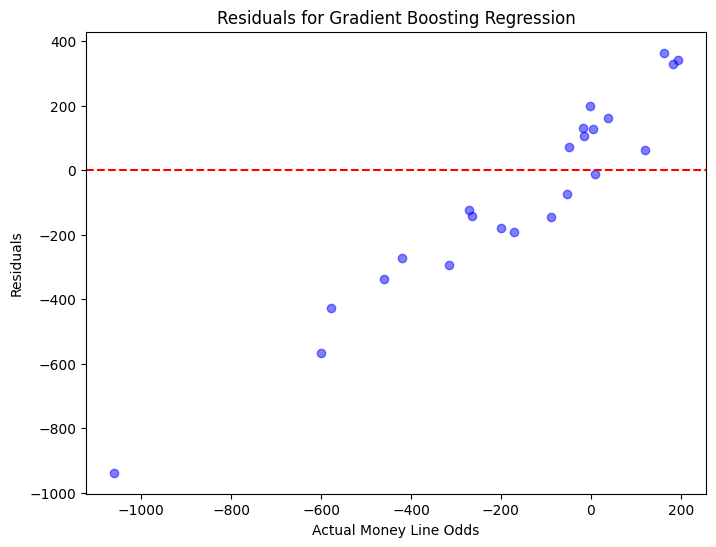

In [56]:
# Assuming 'y_pred_gb' holds the predictions from the Gradient Boosting model
# and 'y_test' contains the actual values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5, label='Gradient Boosting Predictions')
plt.plot(y_test, y_test, 'r--', label='Actual')  # This line represents the perfect predictions
plt.title('Gradient Boosting Predictions vs. Actual')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Predicted Money Line Odds')
plt.legend()
plt.show()

# Calculate residuals
residuals_gb = y_test - y_pred_gb

# Plotting Residuals for Gradient Boosting Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_gb, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for Gradient Boosting Regression')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Residuals')
plt.show()


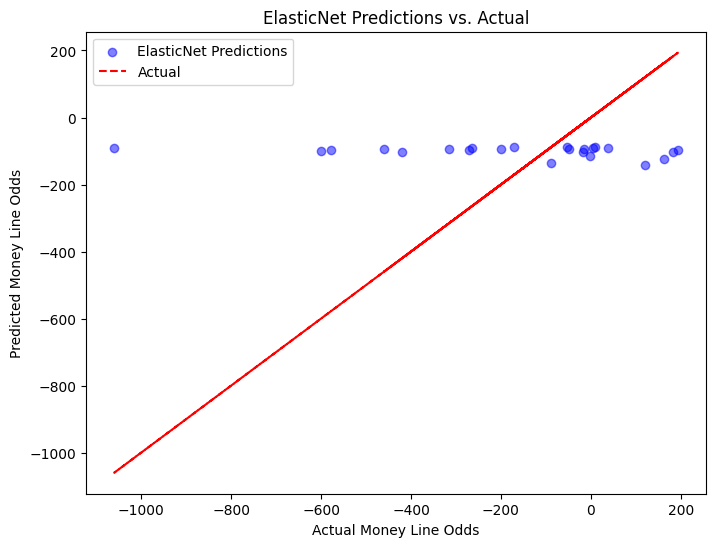

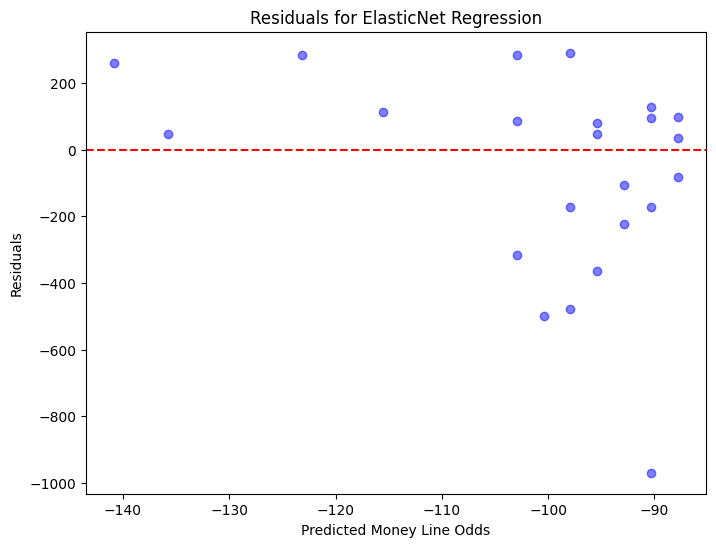

In [54]:
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

# Initialize ElasticNet regressor
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # alpha controls the strength, l1_ratio controls the mix of L1/L2

# Train the model
elastic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_elastic = elastic_model.predict(X_test)

# Plotting ElasticNet predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_elastic, color='blue', alpha=0.5, label='ElasticNet Predictions')
plt.plot(y_test, y_test, 'r--', label='Actual')
plt.title('ElasticNet Predictions vs. Actual')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Predicted Money Line Odds')
plt.legend()
plt.show()

# Calculate residuals
residuals_elastic = y_test - y_pred_elastic

# Plotting Residuals for ElasticNet Model
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_elastic, residuals_elastic, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for ElasticNet Regression')
plt.xlabel('Predicted Money Line Odds')
plt.ylabel('Residuals')
plt.show()


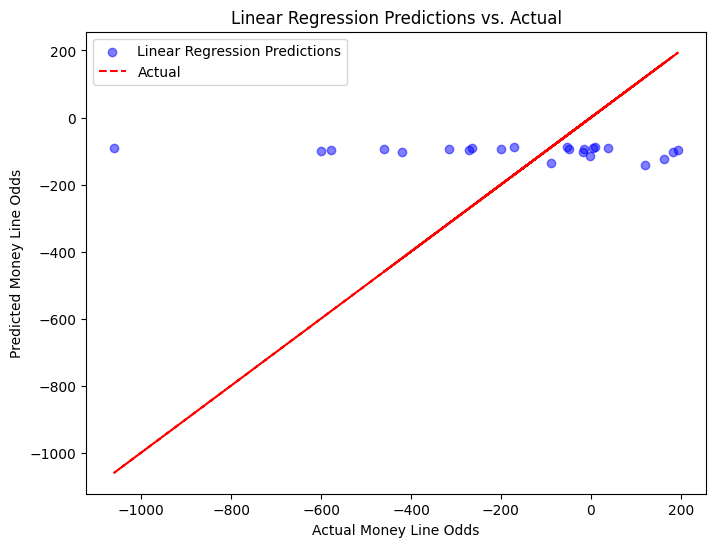

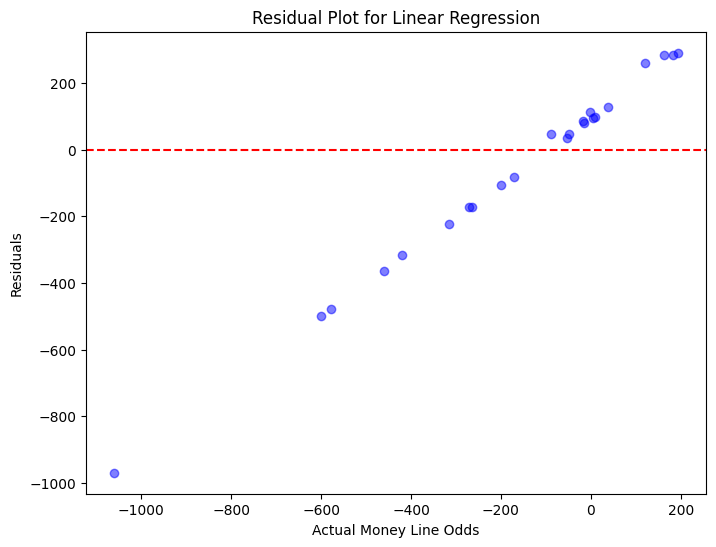

In [44]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Plotting Linear Regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5, label='Linear Regression Predictions')
plt.plot(y_test, y_test, 'r--', label='Actual')
plt.title('Linear Regression Predictions vs. Actual')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Predicted Money Line Odds')
plt.legend()
plt.show()

# Calculate residuals
residuals = y_test - y_pred_linear

# Plotting Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Actual Money Line Odds')
plt.ylabel('Residuals')
plt.show()


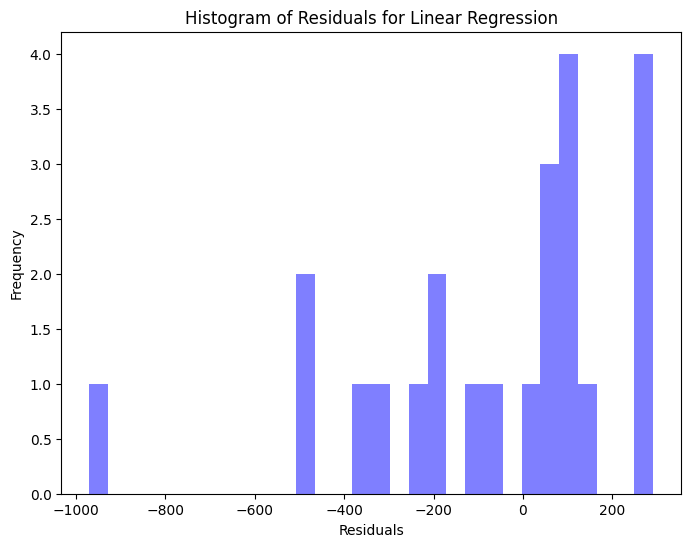

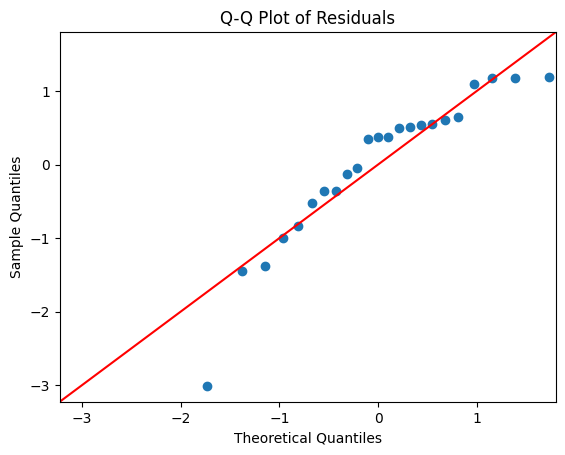

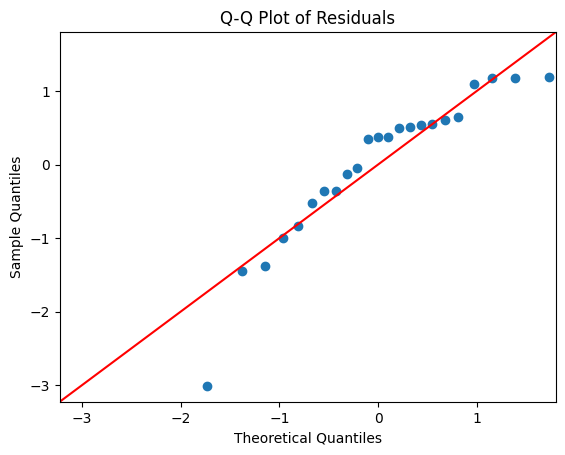

In [68]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_linear

# Plotting the histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.title('Histogram of Residuals for Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()









import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'residuals' are calculated from Linear Regression
sm.qqplot(residuals, line='45', fit=True)  # '45' adds a 45-degree line for reference
plt.title('Q-Q Plot of Residuals')
plt.show()


import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'residuals' are calculated from Linear Regression
sm.qqplot(residuals, line='45', fit=True)  # '45' adds a 45-degree line for reference
plt.title('Q-Q Plot of Residuals')
plt.show()






Summary of Steps and Insights
What Was Done:
Data Preparation: We began by preparing the data for modeling, focusing on using the 'Streak Length' as a predictor for the 'Money Line' betting odds.


Model Selection and Training: Five different regression models were selected to predict the money line odds based on 
the streak length:
Decision Tree Regressor
Gradient Boosting Regressor
K-Nearest Neighbors Regressor
Lasso Regression
Ridge Regression


Model Evaluation: Each model was trained on the training dataset and then used to predict money line odds on the test dataset. The predictions were evaluated using the Mean Squared Error (MSE) metric.


Visualization: Individual plots were created to visualize the predictions from each model compared to the actual values, allowing us to visually assess the performance and prediction accuracy of each model.


Inferences and Insights:

Model Performance: The plots show varying levels of accuracy and tendencies in predictions. Some models, like Lasso and Ridge, tend to have predictions that cluster around a central range, possibly indicating underfitting. The Decision Tree and Gradient Boosting models show more variation, which might be capturing more nuances in the data.

Overfitting vs. Underfitting: Decision Trees and K-Nearest Neighbors are susceptible to overfitting, especially with a lack of tuning (e.g., not limiting tree depth or not choosing the optimal number of neighbors). Lasso and Ridge include regularization, which generally helps prevent overfitting by penalizing larger coefficients.

Effectiveness of Ensemble Methods: The Gradient Boosting model, an ensemble method, generally offers a balance between bias and variance, making it effective in many regression tasks, as suggested by its middle-ground performance in the plots.

Linear vs. Non-Linear Relationships: The varying performance across models also hints at the relationship between streak length and money line odds not being strictly linear, as non-linear models like Gradient Boosting and Decision Trees might capture complex patterns better than linear models like Lasso and Ridge.


These insights can guide further refinement of the models, such as hyperparameter tuning, trying different features for model input, or collecting more data for training. If you have any specific model or aspect you'd like to explore further or adjust, let me know how I can assist!

# Reflection

Small explanation of some betting concepts:

Money Line Odds: These are used by bookmakers to represent the probability of a particular outcome in a sporting event typically a win by either team or participant. The odds reflect the expected likelihood of various outcomes according to the bookmaker, which incorporates historical performance, player streaks, and other factors. Bettors use these odds to make informed decisions on which bets might offer favorable returns.

Player Win Streaks: A player or team's winning streak is a significant factor that can influence money line odds. A longer winning streak might lead to shorter odds (less payout for a win) because the player or team is perceived as more likely to continue their winning ways. Conversely, betting on players or teams with shorter win streaks (or on a losing streak) might offer longer odds (higher payout for a win), reflecting a perceived higher risk of continuing to lose.

The relationship between money line odds and win streaks is a dynamic aspect of sports betting, where bookmakers adjust odds based on recent performances among other factors. While the money line offers a direct insight into the expected outcome from the bookmakers' perspective, win streaks provide bettors with context to assess the form and momentum of the players or teams involved.

Our anaylsis:
It seems like with our won anaylsis of year 2021-2022, when players are on a winning streak it might affect how people bet on games shown by changes in betting odds. But to really understand how much of an effect these streaks have, we need to do more detailed math and analysis. it looks like the longer a player keeps winning, the better the betting odds might become. it's not as simple as it seems because many different things could influence this relationship. this also make us ask the question that does team wining have a bigger effect on money lines. At the moment the individual player how very liitle effect on odds. more analysis is need as well as more data.

# Next Step

# Exploratory Data Analysis

# Visualizations


# Machine Learning Analysis 

# Reflection

# Next Step